

# Interactive Health Data Analysis and Visualization using Python, SQL and DuckDB in Google Colab
### PhD in Health Data Science  - INFORM course

## 1. Introduction
The analysis of clinical and biochemical markers plays a critical role in understanding health conditions, particularly those related to liver function and alcohol consumption. This project leverages Python, SQL, DuckDB, and Google Colab to create an efficient and reproducible data analysis workflow. By combining advanced querying capabilities with interactive visualizations, the project aims to uncover patterns and relationships within the data. The ultimate goal is to demonstrate how modern tools can enhance insights in health data science.

### 1.1 Objectives
1. Data exploration using advanced visualization techniques.
2. Efficient analysis workflows with Python, SQL, and DuckDB.
3. Leveraging Google Colab for collaborative and reproducible results.

### 1.2 Dataset information

The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual. The 6th variable is related to the number of the intake drinks per day.

MCV : mean corpuscular volume
ALP	: alkaline phosphotase
ALT	:	alanine aminotransferase
AST	: aspartate aminotransferase
GGT	: gamma-glutamyl transpeptidase
Drinks : number of half-pint equivalents of alcoholic beverages drunk per day


## 2. Setup of the Environment

- Python libraries: matplotlib, plotly, seaborn, pandas, numpy.

- SQL and DuckDB for querying data directly within Python.

Workflow Setup:
1. Installing and configuring DuckDB.
2. Loading data into DuckDB from Google Colab.

In [85]:
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

In [86]:
import duckdb
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
conn = duckdb.connect()


In [88]:
query = """
CREATE TABLE bupa AS
SELECT
    column0 AS MCV,
    column1 AS ALP,
    column2 AS ALT,
    column3 AS AST,
    column4 AS GGT,
    column5 AS Drinks
FROM read_csv_auto('bupa.data');
"""

In [89]:
conn.execute(query)


In [90]:
query = """
select *
from bupa
"""

In [91]:
df = conn.sql(query).df()
df

,MCV,ALP,ALT,AST,GGT,Drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


## 3. Exploratory Data Analysis (EDA)

- Data Overview: Descriptive statistics (mean, min, max, standard deviation).
- Checking for missing values or inconsistencies.
- Data Cleaning: Handling missing values, duplicates, or formatting issues.

In [92]:

### 1. Basic Data Overview ###
print("### Data Overview ###\n")
print(df.head())  # Display first 5 rows
print("\nShape of the dataset (Rows, Columns):", df.shape)  # Shape of the data
print("\nData Types:\n", df.dtypes)  # Data types of each column

# Check for missing values
print("\n### Missing Values ###")
print(df.isnull().sum())

# Summary statistics for numerical variables
print("\n### Descriptive Statistics ###")
print(df.describe())

# Check for duplicates
print("\n### Duplicates ###")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



### Data Overview ###

   MCV  ALP  ALT  AST  GGT  Drinks
0   85   92   45   27   31     0.0
1   85   64   59   32   23     0.0
2   86   54   33   16   54     0.0
3   91   78   34   24   36     0.0
4   87   70   12   28   10     0.0

Shape of the dataset (Rows, Columns): (345, 6)

Data Types:
 MCV         int64
ALP         int64
ALT         int64
AST         int64
GGT         int64
Drinks    float64
dtype: object

### Missing Values ###
MCV       0
ALP       0
ALT       0
AST       0
GGT       0
Drinks    0
dtype: int64

### Descriptive Statistics ###
              MCV         ALP         ALT         AST         GGT      Drinks
count  345.000000  345.000000  345.000000  345.000000  345.000000  345.000000
mean    90.159420   69.869565   30.405797   24.643478   38.284058    3.455072
std      4.448096   18.347670   19.512309   10.064494   39.254616    3.337835
min     65.000000   23.000000    4.000000    5.000000    5.000000    0.000000
25%     87.000000   57.000000   19.000000   19.00000

Despite having 4 duplicate rows, we decided to retain these values since there are no unique identifiers in the dataset. These duplicates correspond to individuals who have identical values results.

## 4. Data Visualization


## 4.1 Box Plot distribution

Boxplots are great for comparing distributions, showing central tendency (median), spread (interquartile range), and the presence of outliers.

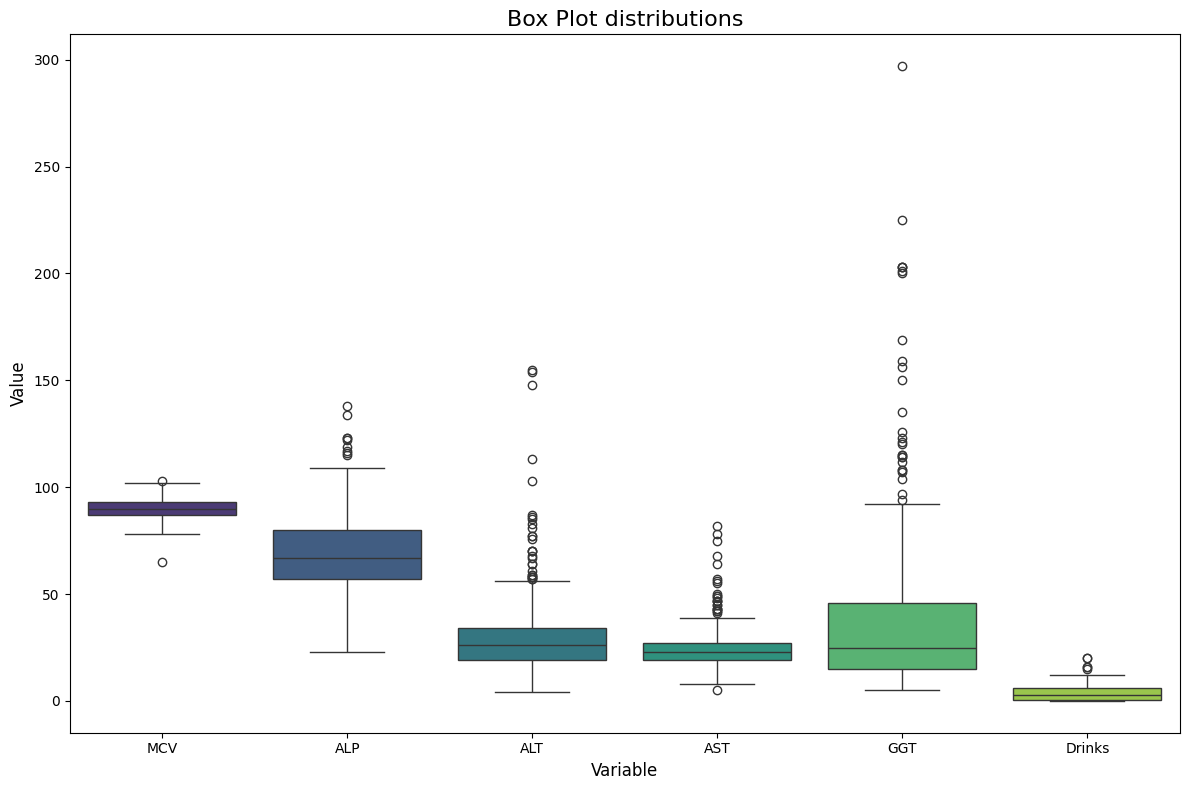

In [93]:


# Data
df.columns = ['MCV', 'ALP', 'ALT', 'AST', 'GGT', 'Drinks']

# Long_data
long_data = df.melt(value_vars=['MCV', 'ALP', 'ALT', 'AST', 'GGT', 'Drinks'],
                    var_name='Variable',
                    value_name='Value')

# Plot
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=long_data,
    x='Variable',
    y='Value',
    hue='Variable',
    palette="viridis",
    dodge=False
)

# Titles
plt.title('Box Plot distributions', fontsize=16)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.tight_layout()

plt.show()



### 4.2 Correlation between ALT and AST
 The scatter plot above illustrates the relationship between the variables ALT and AST, two important biochemical markers related to liver function. As expected the points show a positive linear trend, this suggests a direct association between the two variables, meaning higher ALT values are likely associated with higher AST values.

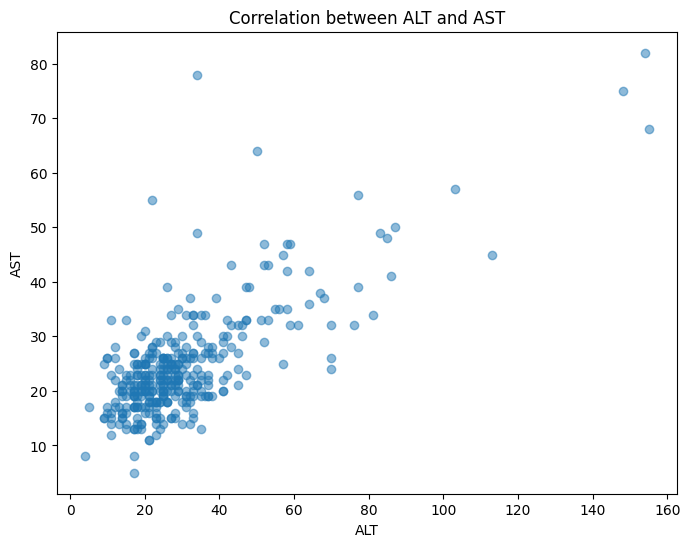

In [94]:

plt.figure(figsize=(8, 6))
plt.scatter(df['ALT'], df['AST'], alpha=0.5)
plt.title('Correlation between ALT and AST')
plt.xlabel('ALT')
_ = plt.ylabel('AST')

### 4.3 MCV vs Drinks with ALT as Size and GGT as Color

This plot provides a multi-dimensional view of how MCV, Drinks, and liver enzymes (ALT, GGT) are interconnected, allowing for an in-depth analysis of potential patterns between alcohol consumption and liver health. This interactive scatter plot visualizes the relationship between MCV and Drinks, with additional dimensions: the size of each bubble is proportional to ALT levels, providing insight into liver function related to red blood cell volume and alcohol consumption and the color of the bubbles represents GGT, another liver enzyme, with a color gradient indicating its value. Hover Data shows additional information on AST and ALP when hovering over each bubble.

It was expected to see larger bubbles in top of the plot, that would indicate the relation between alcool consuption and liver enzimes increase. That assumption is not clear in this plot.







In [95]:
fig = px.scatter(
    df,
    x="MCV",
    y="Drinks",
    size="ALT",
    color="GGT",
    hover_data=['AST', 'ALP'],
    title="MCV vs Drinks with ALT as Size and GGT as Color"
)

fig.show(renderer="colab")



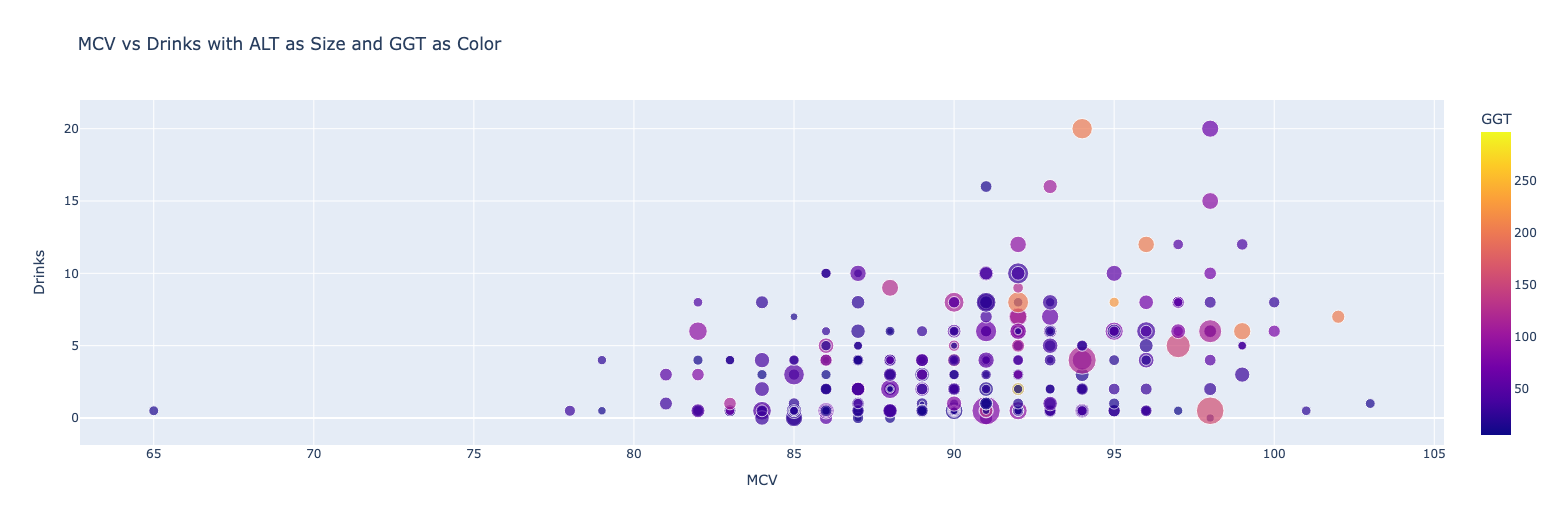

In [96]:
from IPython.display import Image, display

# Static plot
display(Image(filename='/content/bupa.png'))


## 5. Conclusion
This exercise demonstrated the value of a comprehensive approach to data analysis, utilizing tools such as SQL, DuckDB, and various visualization techniques. SQL and DuckDB were instrumental in querying and preparing the data for analysis. By employing a range of visualization techniques, including box plots, correlation analysis, and Plotly Express, we were able to gain a deeper understanding of our data. Box plots provided insights into the distribution of individual variables, while correlation analysis and the interactive visualizations from Plotly Express helped us uncover potential relationships and patterns. This exercise emphasizes the importance of selecting and utilizing appropriate visualization methods to effectively explore and communicate data-driven insights.